In [ ]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles()

## Get started with Mackey-Glass prediction

### Problem statement

This tutorial demonstrates time series prediction with Mackey-Glass (MG) system data available from the ``ReservoirPy`` library.<sup>1</sup> The MG system is nonlinear and can exhibit chaotic behavior within a particular range of system parameters. This behavior is described theoretically by chaos theory. Chaotic systems are very challenging to predict because they are exponentially sensitive to the initial state of the system.

We will look at a quantum noise-induced reservoir (QNIR),<sup>2</sup> implemented with hyperparameter optimization that leverages a novel quantum circuit parameterization approach.<sup>3</sup> QNIR can be applied to nonlinear and chaotic system modeling and, more generally, to time series and sequential forecasting in most industries, like finance, business, economics, climatology, meteorology, and ecology.

### Quantum noise-induced reservoir

Reservoir computing (RC)<sup>3</sup> is a paradigm for time series prediction that draws from some of the successful properties of recurrent neural networks (RNNs), such as sequential memory, while also greatly improving learning efficiency by fixing reservoir weights for all but a single trainable output layer. Although RC is well suited to dynamical system modeling, it is proven to be a universal approximator for sequential functions. Quantum-enhanced RC (QRC) leverages a quantum reservoir, a natural quantum many-body system or a programmable quantum computer circuit. QRC provides a path to Quantum Advantage by using a quantum reservoir with an exponentially larger quantum computational space and greater complexity for time series prediction.

QNIR is a type of QRC that relies on quantum hardware noise—or, as in this instantiation, artificial noise models—as a resource to generate rich, dissipative quantum reservoir dynamics. In future strongly error-mitigated and fault-tolerant quantum computers, QNIR noise channels can be programmed with full control, directly to quantum circuits. In a novel approach, parameterized artificial noise models are programmed to a quantum computer for improved time series prediction performance. This addresses the important need of reservoir optimization in QNIR and QRC in general.

We develop QNIR theory starting from general RC theory. For the univariate case, a reservoir, $f$, is a recurrent function of an input data sequence, $u_t$, and prior reservoir states, $\bar{x}_{t-1}$, given by <a name="eq1"></a>Eq. 1:

\begin{equation}
\bar{x}_t = f(\bar{x}_{t-1},u_t).
\label{eqn:QRC map}
\end{equation}

As output sequences, $\bar{x}_t$, training sequences are selected between time steps $t=t_i$ and $t=t_f$ and form a training design matrix, $\mathbf{X}_{tr}$. A multiple linear regression model is then trained by least squares and solved by the Moore-Penrose pseudo-inverse of the linear equation, as in <a name="eq2"></a>Eq. 2:

\begin{equation}
\mathbf{y} = W^T \mathbf{X}_{tr},
\label{eqn:linear regression training}
\end{equation}

where $\mathbf{y}$ is the target vector and $W$ is an initial weight vector. The trained model has the form of <a name="eq3"></a>Eq. 3:

\begin{equation}
\hat{\mathbf{y}} = W^T_{opt}\mathbf{X}
\label{eqn:linear regression}
\end{equation}

with an optimized weight vector, $W^T_{opt}$, to give a predicted sequence, $\hat{\mathbf{y}}$, from new sequences, $\mathbf{X}$.

<center>
<img src="img/QNIR computer circuits image.png" width="400"/>
</center>
<br>

> Figure 1. Circuit channel diagrams of the QNIR computer in the unrolled view. The initial state of the quantum reservoir is $|+\rangle^{\otimes n}$ and the quantum channels labeled $\mathcal{T}_{u_i}$ evolve the density operator as in Eq. 4, where $N$ quantum circuits are required for $N$ time steps. A number of output sequences, $n$, are concatenated from sequential, single-qubit expectation value measurements $\langle Z_{i} \rangle$ on $n$ qubits.

For QNIR with artificial noise channels, the RC framework that has been developed is now instantiated in the following way. The quantum density operator evolves in time steps, as in <a name="eq4"></a>Eq. 4:

\begin{equation}
\rho_t = \mathcal{T}_{u_t}(\rho_{t-1}),
\label{eqn:QRC evolution}
\end{equation}

where the reservoir map $\mathcal{T}_{u_t}$ is composed of a sequence unitary quantum gates, $U_i$, and associated artificial noise channel, $\mathcal{E}_i$, that are completely positive and trace preserving (CPTP). The reservoir map can be represented as a composition of quantum channels, as in <a name="eq5"></a>Eq. 5:

\begin{equation}
\mathcal{T}_{u_t}(\rho_{t-1}) = \mathcal{E}_{U_K} \circ \ldots \circ \mathcal{E}_{U_2} \circ \mathcal{E}_{U_1} (\rho_{t-1}),
\end{equation}

where the notation $\mathcal{E}_{U_i} = \mathcal{E}_i( U_i \rho U_i^{\dagger} )$ is used for clarity and to emphasize that each quantum gate is acted on by a noisy channel. We will refer to $\mathcal{T}_{u_t}$ as a noisy quantum circuit. QNIR has an initial washout phase, $t<t_i$, where the reservoir forgets its initial state before a steady state is reached, which exemplifies the echo state property.

<center>
<img src="img/QNR scheme1.png" width="500"/>
</center>

> Figure 2. This diagram represents many repetitions of data encoding of a single value, $u_i$, to all reservoir qubits (left) and measurements of single-qubit $Z$ expectation values (right). This two-part process occurs at each time step $i$ to build feature signals by concatenation. Noisy quantum circuits are shown for each time step in Fig. 1. 

The unitary, noiseless part of the quantum circuit is composed of an initial layer of $RX$ gates followed by an entanglement scheme of ${RZ\!Z}_{i,j}$ gates, which are 2-qubit entangling gates, as in <a name="eq6"></a>Eq. 6:

\begin{equation} (C\!X_{i,j}RZ_j(\theta)C\!X_{i,j})RX^{\otimes n}(\theta) =  {RZ\!Z}_{i,j}(\theta)RX^{\otimes n}(\theta),
\label{eqn:QNIR encoding circuit general}
\end{equation}

where all $RX(\theta)$ and $RZ(\theta)$ rotation gates encode the time series data with a scaling map: $\theta=\phi(u)$.

Single-qubit expectation values, $\langle Z_{i} \rangle = Tr(Z_i \rho)$, are measured for all $n$ qubits at each time step, as in <a name="eq7"></a>Eq. 7:

\begin{equation}
h_t = [\langle Z_{1} \rangle,\langle Z_{2} \rangle,\ldots,\langle Z_{n} \rangle]^T,
\end{equation}

and as shown in a circuit diagram in Fig. 1. Fig. 2 depicts that time series values are encoded to all reservoir qubits and $\langle Z_{i} \rangle$ are measured of all qubits, which are concatenated for each time step to give $n$ reservoir feature sequences $q_i = \{\langle Z_{i} \rangle\}_{t=0}^N$, where $N$ is the number of time steps. In turn, $q_i$ form a design matrix $\mathbf{X}$ and the QNIR model is trained, as in Eq. 3. A schematic of the full QNIR computer is shown in Fig. 3.

<center>
<img src="img/QNIR scheme.png" width="450"/>
</center>

> Figure 3. In this illustration, the first layer contains an array of duplicates of a single time series value. Each value in the input array is encoded to all qubits of the reservoir as in Eq. 6. The second layer is a quantum reservoir with an arbitrary entanglement scheme, represented by connecting lines between qubit nodes. The $Z$ observable expectation value, $\langle Z_{i}\rangle$, is measured for all qubits. These measurements are repeated and concatenated to build output signals, $q_i$. In the final layer, these signals are used in multiple linear regression for time series prediction, as in Eq. 2.

It is important in RC and by extension QRC that the reservoir system can capture the temporal dynamics of the target system. To ensure this, we implement a reservoir optimization scheme for QNIR. The artificial noise channels, $\mathcal{E}_i$, of the quantum reservoir circuit are iteratively updated using dual annealing optimization with a mean squared error (MSE) cost function based on the time series prediction performance. This serves to optimize the quantum reservoir for time series prediction. A particular type of noise channel is necessary for a particular initial state of the quantum reservoir; that is, there is a dependency between a prepared initial state and a noise type needed to generate rich feature sequences.

#### Quantum circuit parameterization with noise channels

QNIR uses noise as a necessary resource to generate feature sequences. We use artificial noise models that can be programmed to a quantum computer. To implement a noise scheme, we associate parameterized, single-qubit noise channels with each unitary gate in the quantum circuit, as in Eq. 6. In the following, we assume each noise channel is a function of a single noise parameter.

Noise channels are associated with all quantum gates in the reservoir circuit, as we will see later in this tutorial. Each noise channel $\mathcal{E}(p)$ is a function of a probability for the noise effect to occur. We use probabilities, $p_i$, to parameterize the reservoir for optimization. 

<center>
<img src="img/QNIR optimization.png" width="600"/>
</center>

> Figure 4. This diagram shows the QNIR noise optimization scheme. The quantum model is trained and tested iteratively in a classical optimization loop, where dual annealing or another optimization routine is used. The quantum reservoir circuits have a number of gate-associated noise channels, each of which has a single error probability parameter that is iteratively updated.


QNIR resource noise optimization is performed through iterative training (Eq. 2) and testing (Eq. 3) of QNIR, giving optimized noise probability parameters, $p_i \in \mathbf{p}$ (see Fig. 4). The parameters in the initial parameter vector, $\mathbf{p}$, are probabilities randomly selected from a uniform distribution, $p_i \sim U(0,1), \forall i$. 

Dual annealing is available in the ``SciPy`` optimization package. The MSE was used as a suitable cost function to measure prediction performance, which is minimized, as in <a name="eq8"></a>Eq. 8:

\begin{equation}
\min_{\mathbf{p}}\; \{ \text{MSE}(\hat{\mathbf{y}}(\mathbf{p}),\mathbf{y}) : p_i \in [0,1], \forall i \},
\end{equation}

where $\hat{\mathbf{y}} = W^T_{opt} \mathbf{X}(\mathbf{p})$ is the QNIR test set prediction and $\mathbf{X}(\mathbf{p})$ are the reservoir signals matrix dependent on noise probabilities $\mathbf{p}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import dual_annealing

# Import metrics
from src.forecast_metrics import mase_metric_1ahead as mase
from sklearn.metrics import mean_squared_error, r2_score

from src.qnir_density_matrix_backend import qnir_algorithm_qb

# reservoirpy is not imported in this original notebook
# From reservoirpy.datasets import mackey_glass

def generate_MG_dataset(num_datapoints, delay):
    mg = mackey_glass(num_datapoints+delay, tau=delay)
    src = mg[:-delay].reshape(-1,)
    tgt = mg[delay:].reshape(-1,)
    return src, tgt

#### Mackey-Glass data

The MG delay differential equation (DDE) that describes the nonlinear MG system is

\begin{equation}
\frac{dx}{dt} = \frac{ax(t-\tau)}{1+x(t-\tau)^n} - bx(t).
\label{eqn:Mackey-Glass equation}
\end{equation}

To generate the MG sequence for prediction, the default parameters, $(x_0,a,b,n) = (1.2,0.2,0.1,10)$, are used. The input and target time series are defined as $x(t-\tau)$ and $x(t)$, respectively.

The example MG data used in this tutorial was obtained using the `mackey_glass` function in the ``ReservoirPy`` library and saved to a file from which the data is now loaded. In this notebook, the data was previously prepared using the custom function `generate_MG_dataset(num_datapoints, delay)` in the cell above, where `num_datapoints` is the length of the sequence and `delay` is the number of sequence steps that separate the input sequence and the target sequence. The target sequence is a number of steps ahead of the input sequence, specified by the delay integer. 

In this example, the MG data was initially prepared with a delay of 25 steps and 800 sequence steps. The delay parameter is an important MG system parameter that is related to the level of nonlinearity of the prediction task. In this case, the system is known to be chaotic. We will use “MG25” notation to refer to this task. The data is then downsampled with even indices to reduce simulation runtime.

In [2]:
s = pd.read_csv('src/Mackey-Glass_25_sample_data.csv')['source'].to_numpy()
y = pd.read_csv('src/Mackey-Glass_25_sample_data.csv')['target'].to_numpy()
N = len(s)

In [3]:
plt.figure(figsize=(12, 2))
plt.plot(s, label='MG25 input');
plt.plot(y, label='MG25 target');
plt.legend(loc="upper left")
plt.ylabel('Scaled pop. density', fontsize=8)
plt.xlabel('Time steps', fontsize=8)
plt.xlim(0, N);

When the delayed sequences are plotted against each other, their chaotic attractor can be visualized. An image of the attractor plot produced by the following commented code is displayed here.

In [5]:
#plt.figure(figsize=(5, 5))
#si, yi = generate_MG_dataset(800, 25)
#plt.plot(si, yi, linewidth=0.5, color='dodgerblue');

<center>
<img src="img/MG25_sample_attractor.png" width="450"/>
</center>

#### QNIR code

QNIR is implemented as a bivariate regression algorithm, regressing an input sequence to a target sequence.

The number of qubits selected for the quantum reservoir is 36. This number has been chosen based on prior experimentation for good prediction performance. Similar considerations led to choosing pair-separable entanglement.

In [4]:
num_qubits = 36      # (use multiples of 4 qubits)
num_params = int(3.5*num_qubits)
print(f"Number of qubits is {num_qubits}")
print(f"Number of tunable noise parameters is {num_params}")

# Initial random array of unoptimized parameters
prob_list = np.random.rand(num_params)

# Need bounds for probability parameters E [0,1]
bounds = [(0.0, 1.0)]*num_params

# Lists for updated parameters and MSE costs
updated_probs = []
mse_costs = []


# Train-validation-test dataset indices
N = len(y)
learn_start = 10
learn_end = N-250
valid_end = N-100

Number of qubits is 36
Number of tunable noise parameters is 126


The following diagram shows an example 4-qubit noisy quantum circuit, or quantum channel, with reset noise subchannels represented with non-unitary `Kraus` `Instructions` in Qiskit. It is clear to see that single-qubit `Kraus` instructions come after all single- and two-qubit gates. The same data value, $\pi$, is encoded to all rotation gate angles in this single iteration example. The initial state of the reservoir is prepared with a noiseless Hadamard layer.

In [4]:
from src.qnir_density_matrix_backend import resetnoise_kraus_list, qr_circ_with_noise
from qiskit import QuantumCircuit

data_value = np.pi

kraus_list = resetnoise_kraus_list(4, np.random.rand(int(3.5*4)))
qc = QuantumCircuit(4)
qc.h(range(4))
qr_circ_with_noise(qc, data_value, kraus_list).draw(fold=1000)

┌───┐┌───────┐┌───────┐     ┌───────┐                       ┌───────┐
q_0: ┤ H ├┤ Rx(π) ├┤ kraus ├──■──┤ kraus ├────────────────────■──┤ kraus ├
     ├───┤├───────┤├───────┤┌─┴─┐├───────┤┌───────┐┌───────┐┌─┴─┐├───────┤
q_1: ┤ H ├┤ Rx(π) ├┤ kraus ├┤ X ├┤ kraus ├┤ Rz(π) ├┤ kraus ├┤ X ├┤ kraus ├
     ├───┤├───────┤├───────┤└───┘├───────┤└───────┘└───────┘└───┘├───────┤
q_2: ┤ H ├┤ Rx(π) ├┤ kraus ├──■──┤ kraus ├────────────────────■──┤ kraus ├
     ├───┤├───────┤├───────┤┌─┴─┐├───────┤┌───────┐┌───────┐┌─┴─┐├───────┤
q_3: ┤ H ├┤ Rx(π) ├┤ kraus ├┤ X ├┤ kraus ├┤ Rz(π) ├┤ kraus ├┤ X ├┤ kraus ├
     └───┘└───────┘└───────┘└───┘└───────┘└───────┘└───────┘└───┘└───────┘

In [5]:
def objective_function(prob_list):
    '''Train on training subset. Optimize for validation subset.'''
    # Pass all data to quantum reservoir
    wo_ =  qnir_algorithm_qb(s, y, prob_list, num_qubits)
    
    # Training dataset:
    y_trange = y[learn_start:learn_end]
    wo_trange = wo_[learn_start:learn_end]
    
    # Train model / fit to training data
    reg = LinearRegression().fit(wo_trange, y_trange)
    
    # Predict on all data
    y_ = reg.predict(wo_)
    
    # MSE score on validation set
    return mean_squared_error(y_[learn_end:valid_end], y[learn_end:valid_end])


def callback_anneal(Xi, mse, c):
    '''
    Appends updated parameters and MSE scores to lists. 
    Prints new MSEs.
    Stops optimization when MSE < 0.01.
    '''
    updated_probs.append([x for x in Xi])
    mse_costs.append(mse)
    print('MSE ', mse)

    if mse < 0.01:
        return True

Dual annealing optimization<sup>4</sup> is used to tune the noise models, parameterized with noise probabilities, in order to optimize the noisy quantum reservoir for the prediction task. The objective function consists of training the model on the training data and minimizing the MSE of the prediction on the validation data. Finally, QNIR will be used to predict 12 months ahead on unseen test data.

Instead of executing dual annealing in the next cell, this notebook contains a good parameter list obtained previously. If you want to move ahead, execute the cell after dual annealing containing `good_prob_list`.

In [ ]:
# Runtime can be a few seconds to a few minutes. If it takes longer, re-run the cell for better initialization state.

result = dual_annealing(objective_function, 
                        x0=prob_list,
                        bounds=bounds,
                        callback=callback_anneal)

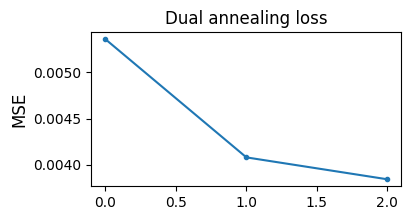

In [67]:
plt.figure(figsize=(4, 2))
plt.ylabel('MSE', fontsize=12)
plt.title('Dual annealing loss')
plt.plot(mse_costs, '.-');

In [5]:
good_prob_list = np.array([0.16645710170269012, 0.7326410710811615, 0.31053710356354713, 0.860971711575985, 0.9370354103157297, 0.0734119862318039, 0.9706290066242218, 0.3489556461572647, 0.4406842067837715, 0.20240511745214462, 0.922575693577528, 0.004665091633796692, 0.504455141723156, 0.18901265412569046, 0.719195750541985, 0.5049160271883011, 0.5421965420246124, 0.8873565495014191, 0.7653307020664215, 0.8567192628979683, 0.9238666892051697, 0.7713912203907967, 0.24634303897619247, 0.45449361950159073, 0.8931180769577622, 0.8056991547346115, 0.4981348291039467, 0.6987218856811523, 0.3154726177453995, 0.9539804384112358, 0.22902802377939224, 0.8669949024915695, 0.21387484669685364, 0.3736894428730011, 0.6019077450037003, 0.8295577466487885, 0.19782364182174206, 0.7857701778411865, 0.25838345289230347, 0.6607986688613892, 0.1158817708492279, 0.7305429428815842, 0.9106668867170811, 0.2763509452342987, 0.0007635727524757385, 0.7071293983608484, 0.9810922741889954, 0.11506856791675091, 0.6061982922255993, 0.7265031561255455, 0.08279132097959518, 0.35857197642326355, 0.9301374033093452, 0.09024184942245483, 0.6522682160139084, 0.6156101003289223, 0.06813075393438339, 0.26916057989001274, 0.02177254855632782, 0.5005682371556759, 0.2637086808681488, 0.6345840767025948, 0.27931488677859306, 0.16109537333250046, 0.32413578033447266, 0.5650568306446075, 0.36316632479429245, 0.7740850448608398, 0.7733319029211998, 0.6803560107946396, 0.31209471821784973, 0.07003211975097656, 0.9192491695284843, 0.226447194814682, 0.7316174916923046, 0.4561610370874405, 0.09397610649466515, 0.6473972499370575, 0.2548901438713074, 0.07642191648483276, 0.8615399599075317, 0.9240171834826469, 0.1998567283153534, 0.08439622819423676, 0.45987097918987274, 0.6172730624675751, 0.9198610186576843, 0.21304520964622498, 0.5046180933713913, 0.039277563453651965, 0.052323780953884125, 0.6485967040061951, 0.05493910610675812, 0.7262236773967743, 0.8866777494549751, 0.21654446423053741, 0.6496624704450369, 0.1821545958518982, 0.27310074120759964, 0.010152459144592285, 0.4425092563033104, 0.7336028292775154, 0.7839899808168411, 0.8874880746006966, 0.07439332455396652, 0.5266144275665283, 0.6838689371943474, 0.1427396424114704, 0.9029368385672569, 0.6549718752503395, 0.49135102331638336, 0.9021500572562218, 0.19285258650779724, 0.23074186965823174, 0.4668574184179306, 0.052186815068125725, 0.6316070556640625, 0.5355350263416767, 0.4037845730781555, 0.3093881905078888, 0.7065616138279438, 0.6606770977377892, 0.20045856991782784, 0.5845199823379517, 0.24269114341586828, 0.39461223036050797])

In [6]:
# Can use saved best_prob_list or the result of dual annealing: updated_probs[-1]

# prob_list = updated_probs[-1]
prob_list = good_prob_list
wo_ = qnir_algorithm_qb(s, y, prob_list, num_qubits)

# Finally, train on test+valid data
y_tvrange = y[learn_start:valid_end]  
wo_tvrange = wo_[learn_start:valid_end]

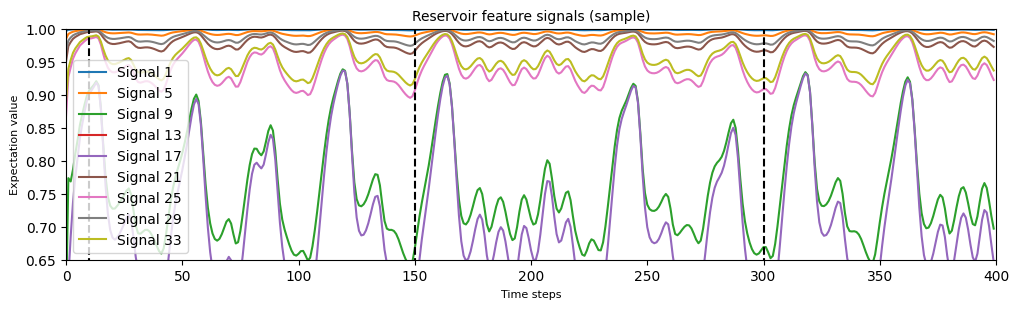

In [7]:
plt.figure(figsize=(12, 3))
for i in range(0, num_qubits, 4):
    plt.plot(np.arange(len(y)), wo_[:, i], label=f'Signal {i+1}')
    plt.ylim([0.65, 1])
    plt.xlim([0, N])

plt.plot([learn_start, learn_start], [0, 1], 'k--')
plt.plot([learn_end, learn_end], [0, 1], 'k--')
plt.plot([valid_end, valid_end], [0, 1], 'k--')
plt.title('Reservoir feature signals (sample)', fontsize=10)
plt.ylabel('Expectation value', fontsize=8)
plt.xlabel('Time steps', fontsize=8)
plt.legend(loc="lower left")
plt.show()

Finally, training is performed on the concatenated training and validation subsets using `Scikit-learn`’s multiple variable linear regression class `LinearRegression`.<sup>5</sup>

In [8]:
# Train model
reg = LinearRegression().fit(wo_tvrange, y_tvrange)

# Predict on all data
y_ = reg.predict(wo_)

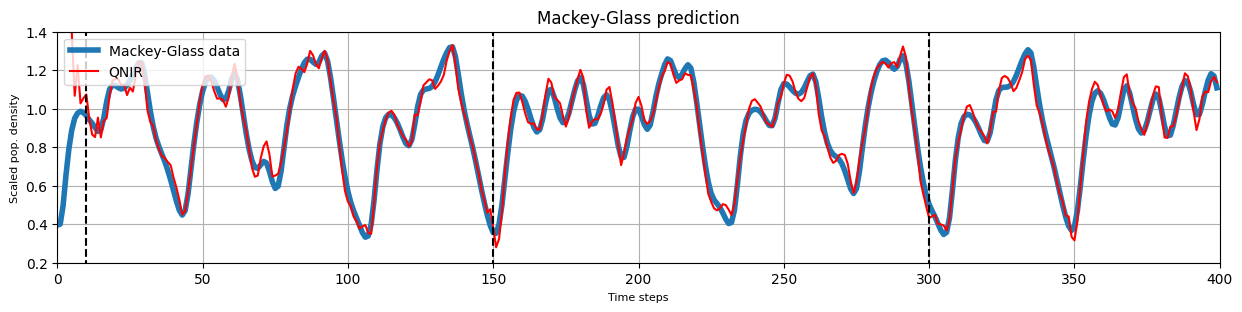

In [9]:
plt.figure(figsize=(15, 3))
plt.plot(np.arange(N), y, '-', label='Mackey-Glass data', linewidth=4)
plt.plot(np.arange(N), y_, 'r-', label='QNIR', markersize=8)

# Plot test-train split boundaries
plt.plot([learn_start, learn_start], [0, 2], 'k--')
plt.plot([learn_end, learn_end], [0, 2], 'k--')
plt.plot([valid_end, valid_end], [0, 2], 'k--')

plt.ylim([0.2, 1.4])
plt.legend(loc="upper left")
plt.title('Mackey-Glass prediction', fontsize=12)
plt.xlim([0, N])
plt.ylabel('Scaled pop. density', fontsize=8)
plt.xlabel('Time steps', fontsize=8)
plt.grid()

In [10]:
print("QNIR MASE", "\t", mase(y_[valid_end:], y[valid_end:]))
print("QNIR MSE", "\t", mean_squared_error(y_[valid_end:], y[valid_end:]))
print("QNIR RMSE", "\t", np.sqrt(mean_squared_error(y_[valid_end:], y[valid_end:])))
print("QNIR R^2", "\t", r2_score(y_[valid_end:], y[valid_end:]))

QNIR MASE 	 0.5733771727226012
QNIR MSE 	 0.0016006828043670816
QNIR RMSE 	 0.04000853414419331
QNIR R^2 	 0.9738319811862178


### Comparison of classical and quantum methods

Classical linear regression is performed between the input and target time series for comparison. In QNIR, the input predictor time series is encoded sequentially to the quantum reservoir, from which a number of feature signals are measured out and used in classical multiple linear regression. In this way, QNIR acts as a sequential quantum feature map for time series. QNIR is capable of modeling nonlinear and chaotic systems that are inherent to many real-world data sources and systems. Quantum reservoirs provide a potential path to Quantum Advantage when a large and non-trivially entangled reservoir that needs to be run on a quantum computer is required for performance improvements over state-of-the-art classical methods.

In [11]:
# Train model
s_tvrange = s[learn_start:valid_end].reshape(-1, 1)
regc = LinearRegression().fit(s_tvrange, y_tvrange)

# Predict on all data
y_c = regc.predict(s.reshape(-1, 1))

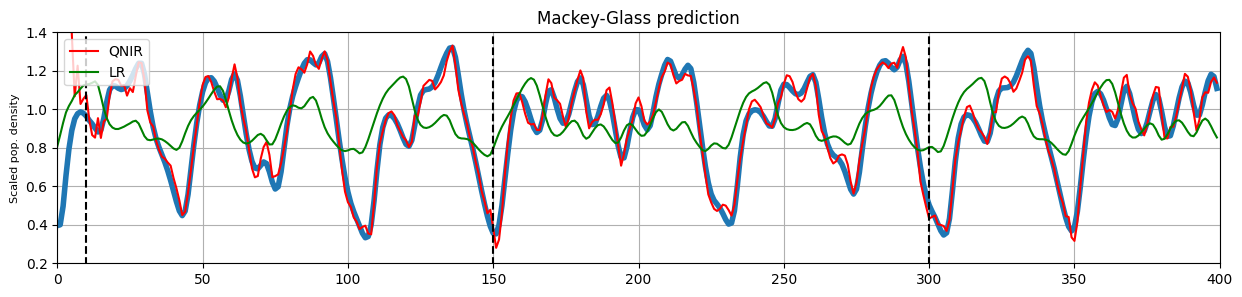

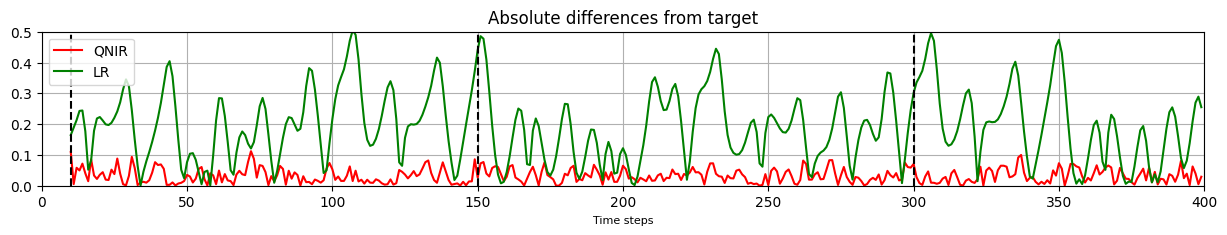

In [12]:
plt.figure(figsize=(15, 3))
plt.plot(np.arange(N), y, '-', linewidth=4)
plt.plot(np.arange(N), y_, 'r-', label='QNIR', markersize=8)
plt.plot(np.arange(N), y_c, 'g-', label='LR', markersize=8)

# Plot test-train split boundaries
plt.plot([learn_start, learn_start], [0, 2], 'k--')
plt.plot([learn_end, learn_end], [0, 2], 'k--')
plt.plot([valid_end, valid_end], [0, 2], 'k--')

plt.legend(loc="upper left")
plt.ylim([0.2, 1.4])
plt.title('Mackey-Glass prediction', fontsize=12)
plt.ylabel('Scaled pop. density', fontsize=8)
plt.xlim([0, N])
plt.grid()


plt.figure(figsize=(15, 2))

plt.plot(np.arange(learn_start, N), np.abs(y_ - y)[learn_start:N], 'r-', label='QNIR', markersize=8)
plt.plot(np.arange(learn_start, N), np.abs(y_c - y)[learn_start:N], 'g-', label='LR', markersize=8)

# Plot test-train split boundaries
plt.plot([learn_start, learn_start], [0, 1], 'k--')
plt.plot([learn_end, learn_end], [0, 1], 'k--')
plt.plot([valid_end, valid_end], [0, 1], 'k--')

plt.legend(loc="upper left")
plt.ylim([0, 0.5])
plt.xlabel('Time steps', fontsize=8)
plt.title('Absolute differences from target', fontsize=12)
plt.xlim([0, N])
plt.grid()

In [13]:
print("LR MASE", "\t", mase(y_c[valid_end:], y[valid_end:]))
print("LR MSE", "\t\t", mean_squared_error(y_c[valid_end:], y[valid_end:]))
print("LR RMSE", "\t", np.sqrt(mean_squared_error(y_c[valid_end:], y[valid_end:])))
print("LR R^2", "\t\t", r2_score(y_c[valid_end:], y[valid_end:]))
print()
print("QNIR MASE", "\t", mase(y_[valid_end:], y[valid_end:]))
print("QNIR MSE", "\t", mean_squared_error(y_[valid_end:], y[valid_end:]))
print("QNIR RMSE", "\t", np.sqrt(mean_squared_error(y_[valid_end:], y[valid_end:])))
print("QNIR R^2", "\t", r2_score(y_[valid_end:], y[valid_end:]))

LR MASE 	 8.92641848984301
LR MSE 		 0.05404956105048883
LR RMSE 	 0.23248561471731716
LR R^2 		 -3.8105615724615305

QNIR MASE 	 0.5733771727226012
QNIR MSE 	 0.0016006828043670816
QNIR RMSE 	 0.04000853414419331
QNIR R^2 	 0.9738319811862178


Given the capability of QNIR to model nonlinear and chaotic systems, we can see that it significantly outperforms linear regression, which is limited to a linear relationship between the input and target sequences only.

### Summary and future prospects

In this tutorial, we examined quantum noise-induced reservoir with optimization for forecasting the Mackey-Glass system.

Extensions may include:

* Compare quantum noise-induced reservoirs with different designs involving more complex entanglement schemes
* QNIR with multiple input time series

### References

1. “ReservoirPy Mackey-Glass data.” ReservoirPy. https://reservoirpy.readthedocs.io/en/latest/api/generated/reservoirpy.datasets.mackey_glass.html#reservoirpy.datasets.mackey_glass.

2. Michael C. Mackey and Leon Glass. “Oscillation and Chaos in Physiological Control Systems.” *Science*, vol. 197, no. 4300 (1997): 287–289. https://www.science.org/doi/10.1126/science.267326.

3. Yudai Suzuki et al. “Natural Quantum Reservoir Computing for Temporal Information Processing.” *Scientific Reports*, vol. 12, no. 1353 (2022). https://doi.org/10.1038/s41598-022-05061-w.

4. Daniel Fry et al. “Optimizing Quantum Noise-Induced Reservoir Computing for Nonlinear and Chaotic Time Series Prediction.” arXiv.2303.05488, 2023. https://doi.org/10.48550/arXiv.2303.05488.

5. Matteo Cucchi et al. “Hands-On Reservoir Computing: A Tutorial for Practical Implementation.” *Neuromorphic Computing and Engineering*, vol. 2, no. 3 (2022). https://iopscience.iop.org/article/10.1088/2634-4386/ac7db7/meta. 

6. “Scipy.optimize.dual_annealing.” SciPy documentation. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html.

7. “Sklearn.linear_model.LinearRegression.” SciPy documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

<span style="font-size:10pt; font-weight:bold;"> &copy; Copyright IBM Corp. 2023 <br/>This content is categorized as an “existing” IBM asset as part of the IBM Quantum Accelerator contract. </span>